# The Perceptron Learning Algorithm

> In this problem, you will create your own target function f and data set D to see
how the Perceptron Learning Algorithm works. Take d = 2 so you can visualize the
problem, and assume X = [−1, 1] × [−1, 1] with uniform probability of picking each
x ∈ X .

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import math
from functools import reduce

## Create the experiment

> In each run, **choose a random line in the plane as your target function f** (do this by
taking two random, uniformly distributed points in [−1, 1] × [−1, 1] and taking the
line passing through them), where one side of the line maps to +1 and the other maps
to −1. **Choose the inputs xn of the data set as random points (uniformly in X ), and
evaluate the target function on each xn to get the corresponding output yn.**

In [2]:
# Create a dataset of N training points, evaluated with the target function f
def create_dataset(f, N):
    dataset = [];
    
    for _ in range(N):
        # Choose the inputs xn of the data set as random points
        x1, x2 = np.random.uniform(-1,1,2)
        
        # evaluate the target function on each xn to get the corresponding output yn.
        y = 1 if x2 > f(x1) else -1

        dataset.append([[x1, x2], y])
    
    return dataset;

# Create an experiment: target function and dataset of N training points
def create_experiment(N):
    # Choose a random line in the plane as your target function f
    x1, y1 = np.random.uniform(-1,1,2)
    x2, y2 = np.random.uniform(-1,1,2)

    a = (y2 - y1)/(x2 - x1)

    b = random.uniform(-1, 1)

    def f(x):
        y = a*x + b
        return y
    
    # Create training dataset by selecting N random points, and evaluating f on them
    dataset = create_dataset(f, N)
        
    return (f, dataset)

## Visualization example of one experimentation

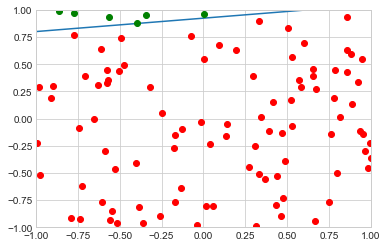

In [3]:
# f is our target function
# dataset is training dataset
f, dataset = create_experiment(100)

plt.axis([-1, 1, -1, 1])

x = np.linspace(-1, 1, 2)
plt.plot(x, f(x))

for data in dataset:
    point = data[0]
    output = data[1]
    plt.plot(point[0], point[1],  'go' if output > 0 else 'ro')

## Run the Perceptron Learning Algorithm

In [5]:
def is_misclassified_point(w, data):
    return (np.sign(np.dot(w, [1, data[0][0], data[0][1]])) != data[1])

In [78]:
# In order to get a reliable estimate for these two quantities, you should repeat the experiment for 1000 runs
NUMBER_OF_RUNS = 1000

# N is the number of training points used in the experiment
def repeat_experiment(N):
    experiments = []
    
    for _ in range(NUMBER_OF_RUNS):
        f, dataset = create_experiment(N)

        #  Start the PLA with the weight vector w being all zeros
        w = [0,0,0]

        # consider sign(0) = 0, so all points are initially misclassified
        misclassified_points = dataset

        number_of_iterations = 0
        while len(misclassified_points) > 0:
            # Pick a random misclassified point
            data = random.sample(misclassified_points, 1)[0]

            # Apply PLA iteration
            w = w + np.dot(data[1], [1, data[0][0], data[0][1]])

            misclassified_points = list(filter(lambda data: is_misclassified_point(w, data), dataset))
            number_of_iterations += 1

        # Disagreement probability between g and f
        # approximate it by generating a sufficiently large, separate set of points to estimate it.
        SEPARATED_DATASET_SIZE = 1000
        separated_dataset = create_dataset(f, SEPARATED_DATASET_SIZE)

        new_misclassified_points = list(filter(lambda data: is_misclassified_point(w, data), separated_dataset))

        error_rate = len(new_misclassified_points)/len(separated_dataset)

        experiments.append([number_of_iterations, error_rate])
        
    return experiments
    
def avg_number_of_iterations(experiments):
    return reduce(lambda accumulator, s: accumulator + s[0], experiments, 0)/len(experiments)

def avg_error_rate(experiments):
    return reduce(lambda accumulator, s: accumulator + s[1], experiments, 0)/len(experiments)

### For N = 10 training points:

In [79]:
experiments = repeat_experiment(10)

print(f'Average number of iterations is: {avg_number_of_iterations(experiments)}')
print(f'Average disagreement is: {avg_error_rate(experiments)}')

Average number of iterations is: 10.088
Average disagreement is: 0.10626000000000008


### For N = 100 training points:

In [80]:
experiments = repeat_experiment(100)

print(f'Average number of iterations is: {avg_number_of_iterations(experiments)}')
print(f'Average disagreement is: {avg_error_rate(experiments)}')

Average number of iterations is: 109.694
Average disagreement is: 0.013800999999999975
